# Valores Perdidos (Missing)

In [1]:
import pandas as pd #Tratamiento de datos
import os #Ficheros de directorios
mainpath = "C:/Users/Bluetab/PDE_DSML_Fundamentos/data/" #Ruta de archivos
filename = "titanic3.csv" #Nombre del archivo
fullpath = os.path.join(mainpath, filename)

In [2]:
#COMO ENCONTRAR SUS RUTAS
import os
os.getcwd()

'C:\\Users\\Bluetab\\PDE_DSML_Fundamentos'

In [3]:
#CARGAR TUS BASES
data = pd.read_csv(fullpath)
data
#data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
#COLUMNAS QUE NO CONTENGAN MISSING - ELIMINAR COLUMNAS QUE CONTENGA ALGÚN MISSING
Columns_with_na_dropped = data.dropna(axis=1)
Columns_with_na_dropped.head()

,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781


In [5]:
#FILAS QUE NO CONTENGAN MISSING
Rows_with_na_dropped = data.dropna(axis=0)
Rows_with_na_dropped.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [6]:
#IMPRIMIR NÚMERO DE COLUMNAS ORIGINALES - Y COLUMNAS FINALES
print("Columnas en el conjunto de datos original: %d" % data.shape[1])
print("Columnas finales: %d" % Columns_with_na_dropped.shape[1])

Columnas en el conjunto de datos original: 14
Columnas finales: 7


In [7]:
#porcentaje de columnas en missing
print(str(Columns_with_na_dropped.shape[1]/data.shape[1]*100) + "%")

50.0%


In [8]:
#Número de columnas que tienen todo poblado
Columns_with_na_dropped.shape[1]

7

In [9]:
#metodo visual para ver que columnas contienen algún missing
data.isnull().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [10]:
#Columnas con missing
null_columns=data.columns[data.isnull().any()]
print(null_columns)

Index(['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], dtype='object')


In [11]:
data[data.isnull().any(axis=1)].head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [12]:
#numero de missing por columnas
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
#numero de missing por columnas
data.isnull().sum()/1309

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [15]:
import missingno as msno

<AxesSubplot:>

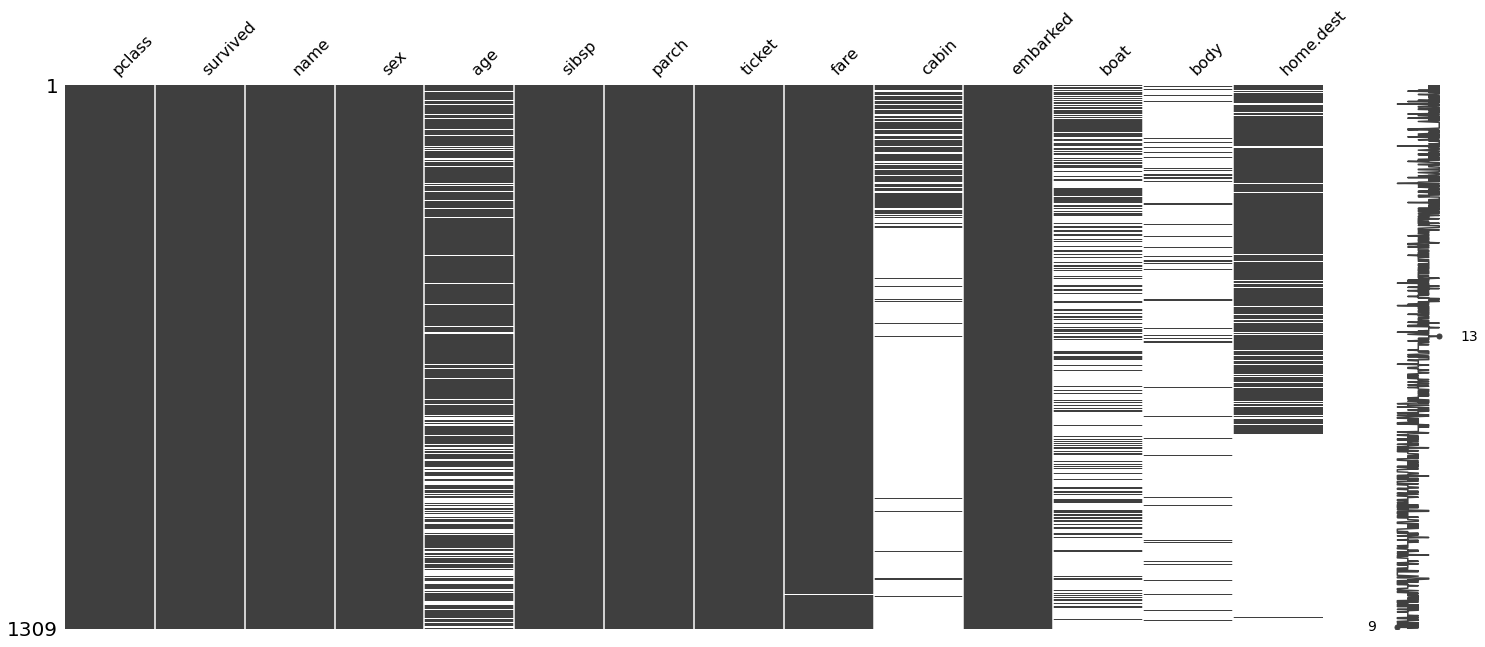

In [16]:
msno.matrix(data) 

<AxesSubplot:>

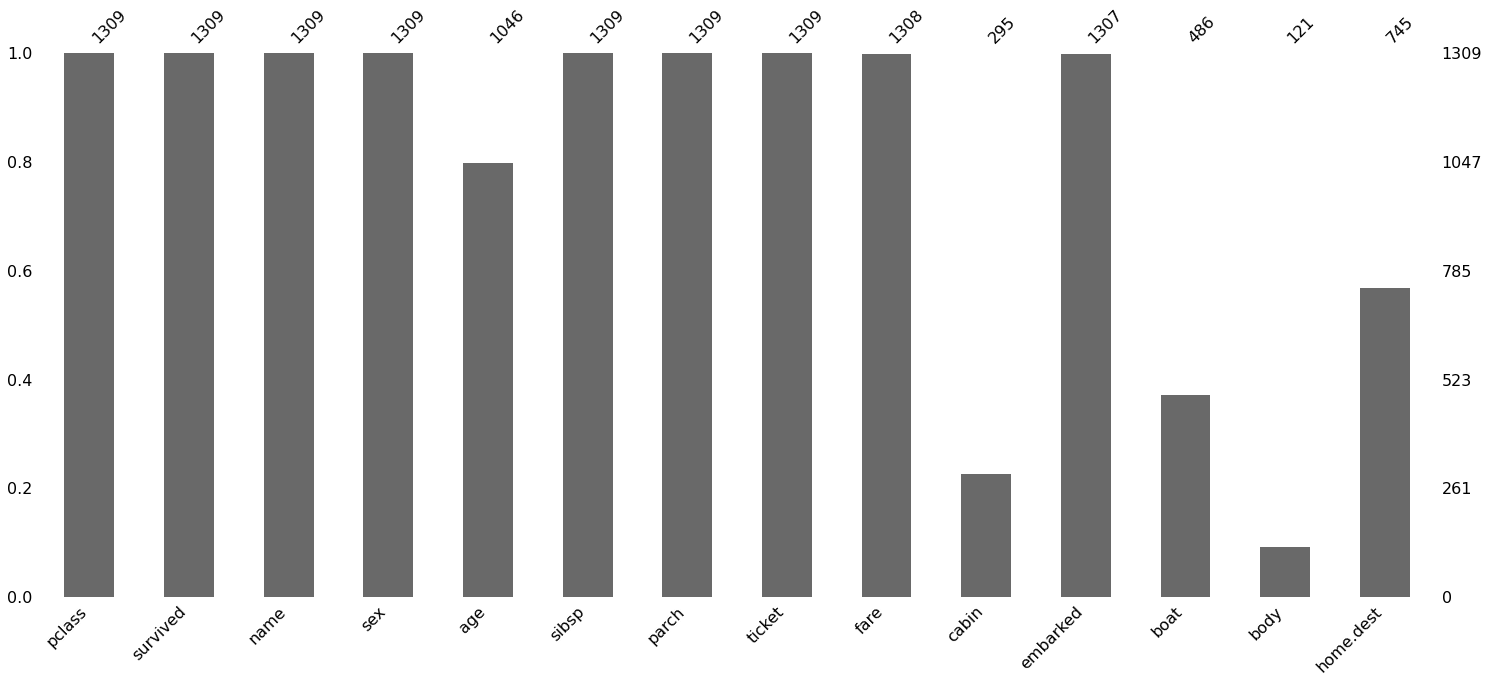

In [17]:
msno.bar(data)

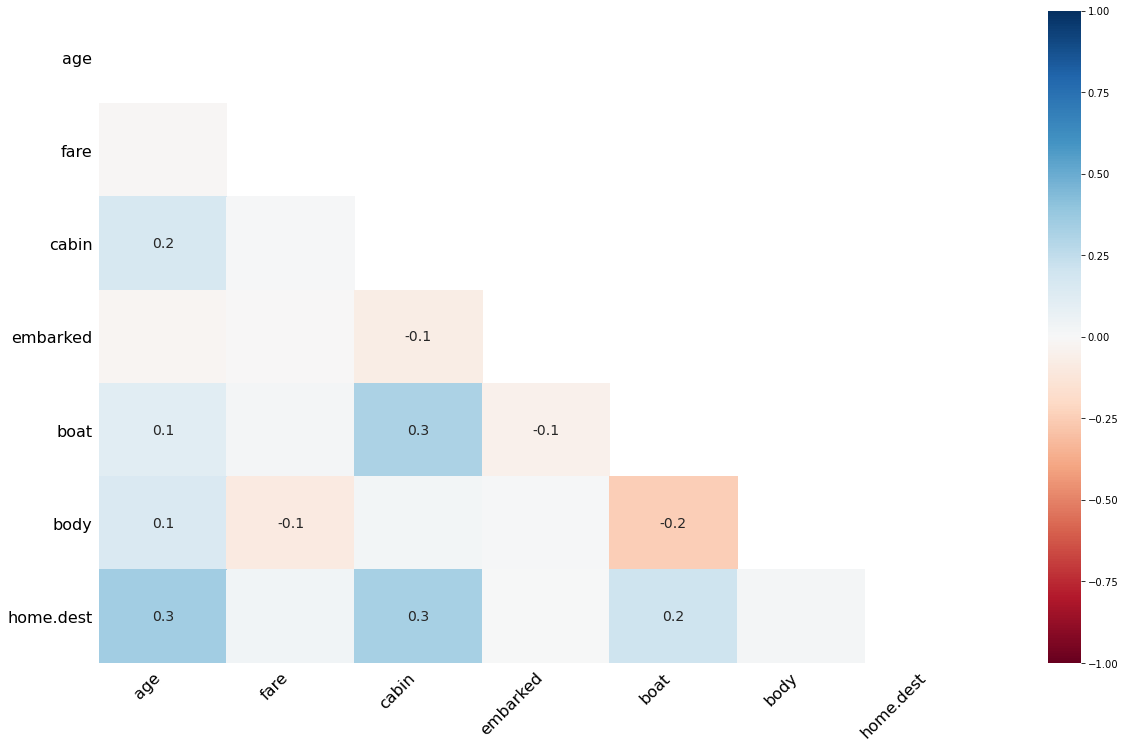

In [18]:
#Matriz de correlaciones entre el numero de missing en cada columna
msno.heatmap(data)

# Imputaciones

In [18]:
data["age"]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [20]:
#Imputacion Forward Fill. Si la BD está ordenada por una variable. Ejemplo: Series de tiempo
data["age"].fillna(method="ffill")

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [21]:
# Imputacion Backward Fill. Si la BD esta agrupada por rango de edades
data["age"].fillna(method="bfill")

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [22]:
print(data["age"].mean()) #No usar cuando hay valores extremos
print(data["age"].median()) #La mediana no es sensible a valores extremos
print(data["age"].mode()) #No usar cuando hay desagregaciones

29.8811345124283
28.0
0    24.0
dtype: float64


In [23]:
data["age"].fillna(data["age"].median())

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    28.0000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [24]:
n=data[data["sex"]=="female"]["age"].mean()
print(n)

28.6870706185567


In [25]:
m=data[data["sex"]=="male"]["age"].mean()
print(m)

30.585232978723408


# Imputación de datos usando la libreria feature-engine

In [19]:
pip install feature-engine

In [23]:
from feature_engine.imputation import MeanMedianImputer

In [27]:
mmi = MeanMedianImputer(imputation_method='median')
data_imp=mmi.fit(data)
data_imp=mmi.transform(data)

<AxesSubplot:>

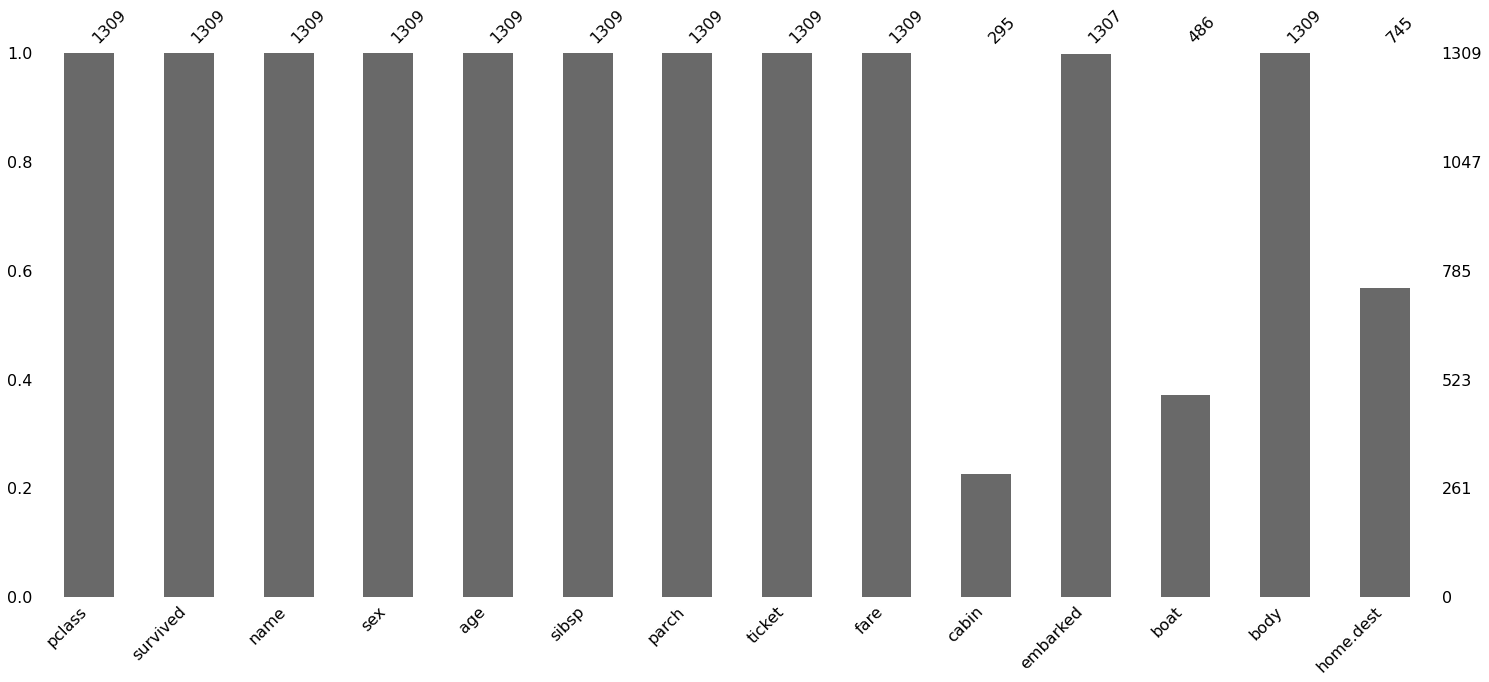

In [28]:
msno.bar(data_imp)

# Outliers

In [29]:
#Nos vamos a crear una data simulada
import numpy as np
import random
np.random.seed(20)
mu, sigma = 0, 0.1 # para una standar
dat1 = np.random.normal(mu,sigma,1000)
dat2 = np.random.normal(mu,sigma,1000)
dat3 = np.random.normal(mu,sigma,1000)
dat4 = np.random.normal(mu,sigma,1000)
dat5 = np.random.normal(mu,sigma,1000)
dat1=pd.DataFrame(data=dat1, columns = ['C1'])
dat2=pd.DataFrame(data=dat2, columns = ['C2'])
dat3=pd.DataFrame(data=dat3, columns = ['C3'])
dat4=pd.DataFrame(data=dat4, columns = ['C4'])
dat5=pd.DataFrame(data=dat5, columns = ['C5'])
final=pd.concat([dat1, dat2, dat3,dat4,dat5], axis=1)
final

,C1,C2,C3,C4,C5
0,0.088389,0.014160,0.122290,0.002702,0.107787
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669
2,0.035754,0.113429,-0.182908,0.058071,-0.066771
3,-0.234326,0.079154,0.012082,0.070045,0.135251
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278
...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363
996,-0.083846,-0.031427,0.103903,0.081073,0.022377
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919


## Boxplot

<AxesSubplot:>

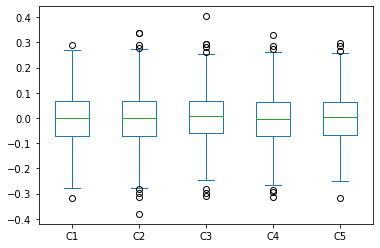

In [30]:
final.plot.box() #grid='True'

Text(0.5, 1.0, 'Título')

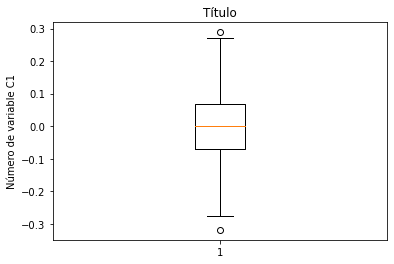

In [31]:
import matplotlib.pyplot as plt
plt.boxplot(final["C1"])
plt.ylabel("Número de variable C1")
plt.title("Título")

In [32]:
final.iloc[23:24, 4:5]=final.iloc[23:24, 4:5]*10
final.iloc[60:61, 4:5]=final.iloc[60:61, 4:5]*10

In [33]:
final.iloc[60:61, 4:5]

,C5
60,1.431494


In [34]:
final.iloc[23:24, 4:5]

,C5
23,-0.312961


<AxesSubplot:>

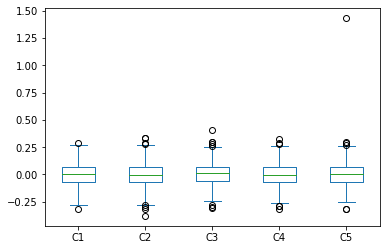

In [35]:
final.plot.box() #grid='True'

## Rango Intercuartilico

In [36]:
#valor outlier
iqr = final["C5"].quantile(0.75) - final["C5"].quantile(0.25)
final["flg_out"]=(final["C5"]< np.percentile(final["C5"], 25)-1.5*iqr) | (final["C5"]> np.percentile(final["C5"], 75)+1.5*iqr)

In [37]:
final[final["flg_out"]==True]

,C1,C2,C3,C4,C5,flg_out
23,0.133278,0.040309,-0.044483,-0.029653,-0.312961,True
57,0.150340,-0.017031,0.067384,-0.018522,0.286735,True
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True
578,-0.017556,0.099622,0.041694,-0.038314,0.299323,True
789,-0.142838,0.127591,-0.085560,0.142109,-0.315420,True
934,0.165524,-0.154261,-0.030113,0.033099,0.265841,True


## Puntuación Z

In [38]:
from sklearn import preprocessing
p1=preprocessing.scale(final["C5"])
final["flg_out2"]=abs(p1)>2
final

,C1,C2,C3,C4,C5,flg_out,flg_out2
0,0.088389,0.014160,0.122290,0.002702,0.107787,False,False
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669,False,False
2,0.035754,0.113429,-0.182908,0.058071,-0.066771,False,False
3,-0.234326,0.079154,0.012082,0.070045,0.135251,False,False
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278,False,False
...,...,...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363,False,False
996,-0.083846,-0.031427,0.103903,0.081073,0.022377,False,False
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171,False,False
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919,False,False


In [39]:
final[final["flg_out2"]==True]

,C1,C2,C3,C4,C5,flg_out,flg_out2
23,0.133278,0.040309,-0.044483,-0.029653,-0.312961,True,True
57,0.150340,-0.017031,0.067384,-0.018522,0.286735,True,True
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True,True
79,0.048740,-0.028125,-0.131821,0.016281,-0.248788,False,True
122,0.160599,0.045370,0.038516,-0.122487,-0.224194,False,True
174,0.042905,-0.033514,0.051242,-0.082272,-0.238704,False,True
207,0.171228,0.198677,0.127696,-0.153090,0.224351,False,True
212,0.054157,-0.017794,0.110644,0.060262,0.216929,False,True
252,0.180101,-0.127071,-0.112719,0.081054,0.250721,False,True
255,-0.114817,-0.038633,0.138094,0.030414,-0.217423,False,True


## Estimadores Robustos

In [40]:
final2=final.iloc[:, 0:5]
final2

,C1,C2,C3,C4,C5
0,0.088389,0.014160,0.122290,0.002702,0.107787
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669
2,0.035754,0.113429,-0.182908,0.058071,-0.066771
3,-0.234326,0.079154,0.012082,0.070045,0.135251
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278
...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363
996,-0.083846,-0.031427,0.103903,0.081073,0.022377
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919


In [41]:
from scipy.spatial.distance import mahalanobis
import scipy as sp
import pandas as pd

x = final2
#x = x.iloc[:,1:]

#matriz de covarianzas
Sx = x.cov().values
#inversa de la matriz de covarianzas
Sx = sp.linalg.inv(Sx)

mean = x.mean().values

def mahalanobisR(X,meanCol,IC):
    m = []
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(m)

mR = pd.DataFrame(mahalanobisR(x,mean,Sx), columns = ['mR'])
final['mr']=mR

In [42]:
final['index'] = final.index
final

,C1,C2,C3,C4,C5,flg_out,flg_out2,mr,index
0,0.088389,0.014160,0.122290,0.002702,0.107787,False,False,3.186345,0
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669,False,False,2.404597,1
2,0.035754,0.113429,-0.182908,0.058071,-0.066771,False,False,5.705727,2
3,-0.234326,0.079154,0.012082,0.070045,0.135251,False,False,8.542547,3
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278,False,False,1.655564,4
...,...,...,...,...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363,False,False,4.488254,995
996,-0.083846,-0.031427,0.103903,0.081073,0.022377,False,False,2.502722,996
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171,False,False,4.557502,997
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919,False,False,5.457864,998


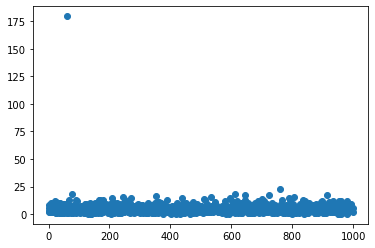

In [43]:
plt.scatter(final["index"],final['mr'])

In [44]:
final[final["mr"]>20]

,C1,C2,C3,C4,C5,flg_out,flg_out2,mr,index
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True,True,179.436119,60
759,0.288782,0.251704,0.171881,0.120547,-0.193070,False,False,23.319516,759


# Manejo de Outliers utilizando la librería feature_engine

In [45]:
from feature_engine.outliers import Winsorizer

In [50]:
wz = Winsorizer(capping_method='gaussian', tail='both', fold=3)
final_out=wz.fit(final2)
final_out=wz.transform(final2)

In [47]:
wz.right_tail_caps_

{'C1': 0.2947574651722683,
 'C2': 0.30268752064843557,
 'C3': 0.2941266068579752,
 'C4': 0.29991105825077546,
 'C5': 0.32242723385576333}

In [48]:
wz.left_tail_caps_

{'C1': -0.29489716815989053,
 'C2': -0.3050114265890063,
 'C3': -0.2871019826534208,
 'C4': -0.3032958449953961,
 'C5': -0.32274337220548865}

In [49]:
final2.iloc[60:61, 4:5]

,C5
60,1.431494


In [51]:
final_out.iloc[60:61, 4:5]

,C5
60,0.322427


# Transformaciones

## Normalización y escalamiento

In [42]:
import pandas as pd
import os
mainpath = "C:/Users/Jorge/PDE_DSML_Notebooks/data/"
filename = "credit2.csv"
fullpath = os.path.join(mainpath, filename)
#CARGAR TUS BASES
#data = pd.read_csv(fullpath)
data = pd.read_csv(fullpath,sep=';')
data.head(10)
data.dtypes
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo
...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo


### Crear factores categoricos

In [43]:
data['Y_2'] = pd.factorize(data["Y"])[0]
data[['Y_2','Y']]
data["Y_2"] = data["Y_2"].astype('category')
data["Y_2"]

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Y_2, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [44]:
data.dtypes

Y           object
Cuenta      object
Mes          int64
Ppag        object
Uso         object
DM           int64
Sexo        object
Estc        object
Y_2       category
dtype: object

## Normalización Z-Score

In [45]:
from sklearn import preprocessing
data["DM_ZS"]=preprocessing.scale(data["DM"])
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_ZS
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,0,-0.861381
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,0,-0.407341
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,0,-0.389974
...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,1,-0.455191
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,1,-0.343187
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,1,3.334852
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1,1.133062


## Norm Min-Max

In [46]:
from sklearn.preprocessing import MinMaxScaler
#[a,b] [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

A = scaler.fit_transform(data[["DM"]])

data["DM_MM"]=pd.DataFrame(data=A)
data["DM_MM"].max()

1.0

## Escalamiento Decimal

In [47]:
maxvect=max(abs(data["DM"]))
maxvect

18424

In [48]:
import math
kvector=math.floor(math.log10(maxvect))
kvector=kvector+1

In [49]:
scalefactor = 10**kvector
scalefactor

100000

In [50]:
data["DM_ED"]=data["DM"]/scalefactor

In [51]:
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,Y_2,DM_ZS,DM_MM,DM_ED
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,0,-0.787657,0.043964,0.01049
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,0,-0.167384,0.140255,0.02799
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,0,-0.861381,0.032519,0.00841
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,0,-0.407341,0.103004,0.02122
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,0,-0.389974,0.105700,0.02171
...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,1,-0.455191,0.095576,0.01987
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,1,-0.343187,0.112964,0.02303
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,1,3.334852,0.683944,0.12680
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1,1.133062,0.342137,0.06468


## Normalización Softmax

In [2]:
A = preprocessing.scale(data["DM"])
M=pd.DataFrame(data=A,columns=["A"])
M
M["A"]=M["A"]*-1
M
N=1/(1+np.exp(M["A"]))
data["DM_SM"]=N
data

NameError: name 'preprocessing' is not defined

In [3]:
data.iloc[:,9:].plot.box(grid='True') #grid='True'
data.iloc[:,5:6].plot.box(grid='True') #grid='True'

TypeError: no numeric data to plot

# Variables Categóricas y Transformaciones

In [54]:
pip3 install feature_engine

In [6]:
import pandas as pd
import os
mainpath = "C:/Users/Jorge/PDE_DSML_Notebooks/data/"
filename = "credit2.csv"
fullpath = os.path.join(mainpath, filename)
#CARGAR TUS BASES
data = pd.read_csv(fullpath, sep=';')
data.head(10)
data.dtypes
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo
...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo


## Factores de igual frecuencia

In [7]:
from feature_engine import discretisers as dsc

In [8]:
disc = dsc.EqualFrequencyDiscretiser(q=10, variables=['DM'])
disc.fit(data)
data_t= disc.transform(data)
data_t["N"]=1
data_t

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,N
0,buen,no,18,pre buen pagador,privado,1,mujer,vive solo,1
1,buen,no,9,pre buen pagador,profesional,5,hombre,no vive solo,1
2,buen,bad running,12,pre buen pagador,profesional,0,mujer,vive solo,1
3,buen,no,12,pre buen pagador,profesional,4,hombre,no vive solo,1
4,buen,no,12,pre buen pagador,profesional,4,hombre,no vive solo,1
...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,4,hombre,no vive solo,1
996,mal,no,24,pre buen pagador,profesional,4,hombre,no vive solo,1
997,mal,good running,21,pre buen pagador,profesional,9,hombre,no vive solo,1
998,mal,bad running,12,pre buen pagador,privado,8,hombre,no vive solo,1


In [9]:
double_group = data_t.groupby(["DM"])

#double_group = data_t.groupby(["DM","Y"])
double_group.sum()[["N"]]

,N
DM,
0,100
1,101
2,99
3,100
4,100
5,100
6,101
7,99
8,100


## Factores de igual amplitud de intervalos

In [10]:
data["DM_OR"]=data["DM"]
disc = dsc.EqualWidthDiscretiser(bins=10, variables=['DM'])
disc.fit(data)
data_t2= disc.transform(data)
data_t2["N"]=1
data_t2

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_OR,N
0,buen,no,18,pre buen pagador,privado,0,mujer,vive solo,1049,1
1,buen,no,9,pre buen pagador,profesional,1,hombre,no vive solo,2799,1
2,buen,bad running,12,pre buen pagador,profesional,0,mujer,vive solo,841,1
3,buen,no,12,pre buen pagador,profesional,1,hombre,no vive solo,2122,1
4,buen,no,12,pre buen pagador,profesional,1,hombre,no vive solo,2171,1
...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,0,hombre,no vive solo,1987,1
996,mal,no,24,pre buen pagador,profesional,1,hombre,no vive solo,2303,1
997,mal,good running,21,pre buen pagador,profesional,6,hombre,no vive solo,12680,1
998,mal,bad running,12,pre buen pagador,privado,3,hombre,no vive solo,6468,1


    DM_OR
DM       
0     250
1    2069
2    3905
3    5711
4    7582
5    9398
6   11328
7   12976
8   14896
9   18424
    DM_OR
DM       
0    2064
1    3878
2    5595
3    7511
4    9283
5   11054
6   12749
7   14782
8   15945
9   18424
      N
DM     
0   445
1   293
2    97
3    80
4    38
5    19
6    14
7     8
8     5
9     1


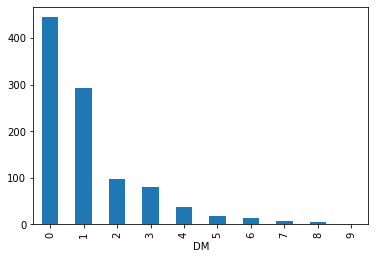

In [11]:
double_group = data_t2.groupby(["DM"])
double_group.sum()
print(double_group.min()[["DM_OR"]])
print(double_group.max()[["DM_OR"]])
#print(max(data["DM_OR"]))
print(double_group.sum()[["N"]])
data_t2.groupby('DM')['DM'].count().plot.bar()

# Transformación de variables

## Transformación Logaritmica

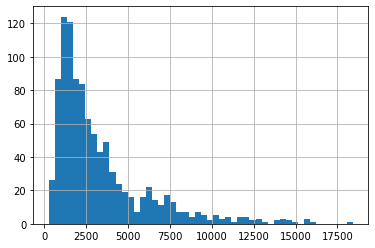

In [12]:
from feature_engine import variable_transformers as vt
# set up the variable transformer
tf = vt.LogTransformer(variables = ['DM'])

# fit the transformer
tf.fit(data)

# transform the data
data_t4= tf.transform(data)
data_t4

# un-transformed variable
data['DM'].hist(bins=50)

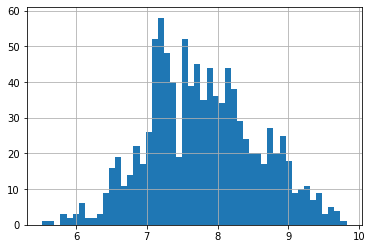

In [14]:
data_t4['DM'].hist(bins=50)

## Transformación Exponencial

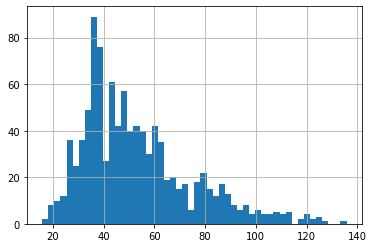

In [15]:
from feature_engine import variable_transformers as vt

# set up the variable transformer
tf = vt.PowerTransformer(variables = ['DM'], exp=0.5)

# fit the transformer
tf.fit(data)

# transform the data
data_t5= tf.transform(data)


# un-transformed variable
data_t5['DM'].hist(bins=50)

## Transformacion Box-Cox

Una transformación de Box-Cox de los datos de su proceso puede ayudar a corregir las siguientes condiciones: Los datos del proceso no están distribuidos normalmente y problemas de heterocedasticidad (la varianza de los errores no es constante).

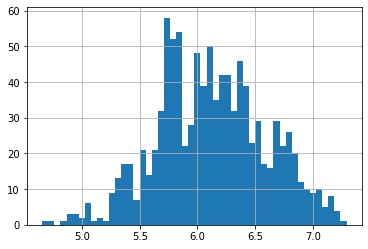

In [64]:
tf = vt.BoxCoxTransformer(variables = ['DM'])


tf.fit(data)


data_t5= tf.transform(data)


#box cox variable
data_t5['DM'].hist(bins=50)

## Transformacion de Yeo-Johnson

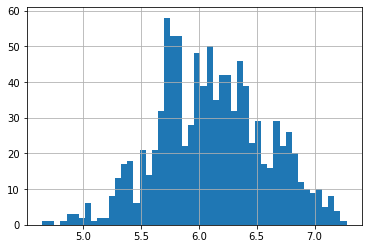

In [65]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = ['DM'])

# fit the transformer
tf.fit(data)

#Learns the optimal lambda for the Yeo-Johnson transformation.

# transform the data
data_t6= tf.transform(data)


# un-transformed variable
data_t6['DM'].hist(bins=50)

## Variables Dummy

In [66]:
data["Sexo"].head(10)

0     mujer
1    hombre
2     mujer
3    hombre
4    hombre
5    hombre
6    hombre
7    hombre
8     mujer
9     mujer
Name: Sexo, dtype: object

In [67]:
dummy_sex = pd.get_dummies(data["Sexo"], prefix="sex")

In [68]:
dummy_sex.head(10)

,sex_hombre,sex_mujer
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,0,1
